## Implement cost function and gradient descent using BOTH for loops and vectorization, compare results with sklearn to verify correctness


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## PART 1: Load And Prepare Data

In [12]:
#Loading the data 
df = pd.read_csv('data/Salary_Data.csv.xls')
print("Dataset shape:", df.shape)

print("\nFirst few rows")
print(df.head())

Dataset shape: (30, 2)

First few rows
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


## PART 2: Visualize the Data

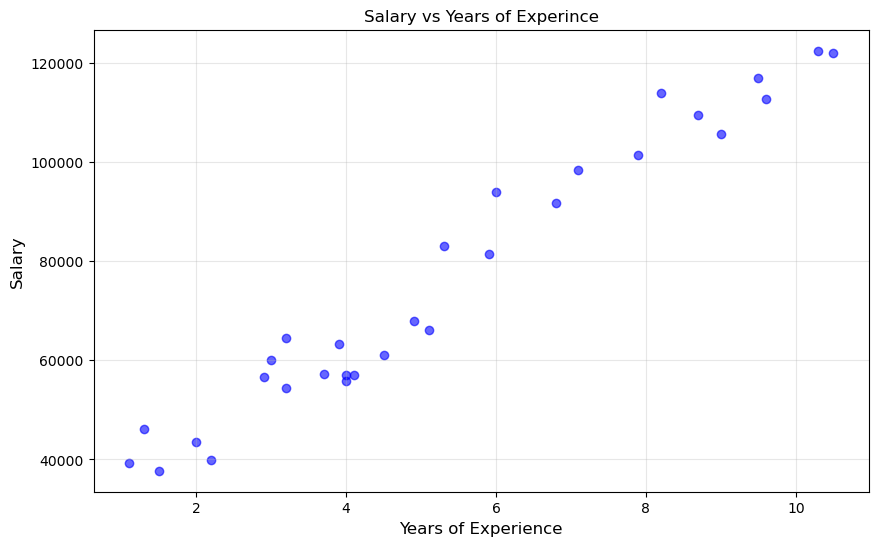

In [7]:
#Visualize the data
plt.figure(figsize = (10,6))
plt.scatter(df["YearsExperience"], df["Salary"], color="blue", alpha = 0.6)
plt.xlabel("Years of Experience", fontsize = 12)
plt.ylabel("Salary", fontsize = 12)
plt.title("Salary vs Years of Experince")
plt.grid(True, alpha = 0.3)
plt.show()

In [6]:
print("Observation: There appears to be a LINEAR relationship between years and salary")

Observation: There appears to be a LINEAR relationship between years and salary


## PART 3: Prepare X and y Correctly

In [8]:
#Define the features (Independed and Dependent Variables)


#X should be all rows, first column(YearsExperience)
X = df.iloc[:,0].values  # .values converts to numpy array

#y should be all rows, last column(Salary)
y = df.iloc[:,-1].values   #.values converts to numpy array

In [9]:
print("\n ----UNDERSTANDING SHAPES ----")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


 ----UNDERSTANDING SHAPES ----
X shape: (30,)
y shape: (30,)


In [10]:
print(X)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [11]:
#For linear regression, we often want X to be 2D (samples,features)
#Even though we have 1 feature, sklearn expects (n_samples, m_features)

X = X.reshape(-1,1)  # -1 means "figure it out", 1 mean 1 column
print(f"X shape after reshape: {X.shape}") #(30,1) --> 2D array

X shape after reshape: (30, 1)


In [12]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [13]:
print("\nWhat this mean: ")
print(f"  - X has {X.shape[0]} samples(people)")
print(f"  - X has {X.shape[1]} features (Years of Experience)")
print(f"  - y has {y.shape[0]} values (salaries)")


What this mean: 
  - X has 30 samples(people)
  - X has 1 features (Years of Experience)
  - y has 30 values (salaries)


## PART 4: Train-Test Split

In [15]:
#Splitting the dataset into train-set and test-set
#30% goes to testing data-set

print("\nWhat we're doing: Dividing data into train(80%) and test (20%) sets")
print("\nWhy: To evaluate model on unseen data")

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size= 0.2,  #20% for testing 
    random_state =2  #For reproducibility 
)


print("\n ---- Train-Test Split ----")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")



What we're doing: Dividing data into train(80%) and test (20%) sets

Why: To evaluate model on unseen data

 ---- Train-Test Split ----
X_train shape: (24, 1)
y_train shape: (24,)
X_test shape: (6, 1)
y_test shape: (6,)


In [18]:
#Scale before training 
scaler_X = StandardScaler()
scaler_y = StandardScaler()

#Fit on training data
X_train_scaled = scaler_X.fit_transform(X_train)  #Learns from train
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()

#Transform test data with same scaler
X_test_scaled = scaler_X.transform(X_test)  #----> transform NOT fit_transform (apply to test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).flatten()

## PART 5: Train Sklearn model (ground- truth)

In [30]:
#Test with sklearn's parameters
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
#Train model on the Training set
model.fit(X_train_scaled, y_train_scaled)


#This outputs an ndarray[] so we are taking the first index which is a float and then round it
m_sklearn = model.coef_[0]
print(f"The slope is, {m_sklearn:.2f}")

#This outputs a single output which is a scalar, no need of indexing
b_sklearn = model.intercept_
print(f"The intercept is, {b_sklearn:.2f}")


#Calculate cost with sklearn's parameters
#cost = compute_cost(X_train, y_train, m_sklearn, b_sklearn)
print(f"\nSalary = {m_sklearn:.2f} * Years + {b_sklearn:.2f}")


The slope is, 0.98
The intercept is, -0.00

Salary = 0.98 * Years + -0.00


In [34]:
#Make predictions 
y_train_pred_sklearn = model.predict(X_train_scaled)
y_test_pred_sklearn = model.predict(X_test_scaled)

#Calculate cost using sklearn's metric
train_cost_sklearn = mean_squared_error(y_train_scaled, y_train_pred_sklearn)
test_cost_sklearn = mean_squared_error(y_test_scaled, y_test_pred_sklearn)

print(f"\nSklearn's Performance:")
print(f"    Trianing Cost (MSE): ${train_cost_sklearn:,.2f}")
print(f"    Test Cost (MSE):     ${test_cost_sklearn:,.2f}")


Sklearn's Performance:
    Trianing Cost (MSE): $0.03
    Test Cost (MSE):     $0.07


## PART 6: Implement Cost Funtion (for loop)

In [37]:
print("What we're doing: Manually calculating Mean Squared Error\n")
print("Formula: MSE = (1/2n) * Σ(y_actual - y_pred)²\n")

What we're doing: Manually calculating Mean Squared Error

Formula: MSE = (1/2n) * Σ(y_actual - y_pred)²



In [39]:
def compute_cost_loop(X, y, m, b):
    n = len(y)
    total_cost = 0 

    for i in range(n):
        y_pred_i = m * X[i, 0] +b
        squared_error = (y[i] - y_pred_i) **2
        total_cost += squared_error

    cost = (total_cost/n)
    return cost

In [41]:
#Test with sklearn's parameters 
print("\n Testing for-loop implementation with sklearn's parameters:")
train_cost_loop = compute_cost_loop(X_train_scaled, y_train_scaled, m_sklearn, b_sklearn)
test_cost_loop = compute_cost_loop(X_test_scaled, y_test_scaled, m_sklearn, b_sklearn)

print(f"    Training Cost (for-loop): ${train_cost_loop:,.2f}")
print(f"    Training Cost (sklearn):  ${train_cost_sklearn:,.2f}")
print(f"    Difference: ${abs(train_cost_loop - train_cost_sklearn):,.3f}")
print("\n")

print(f"    Testing Cost (for-loop):  ${test_cost_loop:,.2f}")
print(f"    Testing Cost (sklearn):   ${test_cost_sklearn:,.2f}")
print(f"    Difference ${abs(test_cost_loop - test_cost_sklearn):,.3f}")


 Testing for-loop implementation with sklearn's parameters:
    Training Cost (for-loop): $0.03
    Training Cost (sklearn):  $0.03
    Difference: $0.000


    Testing Cost (for-loop):  $0.07
    Testing Cost (sklearn):   $0.07
    Difference $0.000


In [43]:
if abs(train_cost_loop - train_cost_sklearn) < 0.01:
    print("\n   ✅ SUCCESS! for loop implementation matches sklearn!")
else:
    print("\n   ❌ ERROR! Implementation doesn't match sklearn")


   ✅ SUCCESS! for loop implementation matches sklearn!


## PART 7: Implement Cost Funtion (Vectorized)

In [46]:
def compute_cost_vectorized(X, y, m, b):
    n = len(y)
    #Make predictions for ALL samples at once
    y_pred = m * X.flatten() + b

    #Calculate squared errors for ALL samples at once
    squared_errors = (y - y_pred) **2

    #Calculate mean
    cost = np.sum(squared_errors)/n
    return cost



In [75]:
#Test with sklearn's parameters
print("\n Testing Vectorized implementation with sklearn's parameters:")
train_cost_vec = compute_cost_vectorized(X_train_scaled, y_train_scaled, m_sklearn, b_sklearn)
test_cost_vec = compute_cost_vectorized(X_test_scaled, y_test_scaled, m_sklearn, b_sklearn)

print(f"    Training Cost (Vectorized): ${train_cost_vec:,.2f}")
print(f"    Testing Cost (Vectorized):  ${test_cost_vec:,.2f}")
print(f"    Difference:                 ${abs(test_cost_sklearn - test_cost_vec):,.3f}")

#print(f" 


 Testing Vectorized implementation with sklearn's parameters:
    Training Cost (Vectorized): $0.03
    Testing Cost (Vectorized):  $0.07
    Difference:                 $0.000


In [50]:
if abs(train_cost_vec - train_cost_sklearn) < 0.01:
    print("\n   ✅ SUCCESS! Vectorized implementation matches sklearn!")
else:
    print("\n   ❌ ERROR! Implementation doesn't match sklearn")


   ✅ SUCCESS! Vectorized implementation matches sklearn!


## PART 8: Compare all the Cost Implementations

In [53]:

print(f"{'sklearn (ground truth)':<30} ${train_cost_sklearn:<19,.2f} ${test_cost_sklearn:<19,.2f}")
print(f"{'For loop':<30} ${train_cost_loop:<19,.2f} ${test_cost_loop:<19,.2f}")
print(f"{'Vectorized':<30} ${train_cost_vec:<19,.2f} ${test_cost_vec:<19,.2f}")


sklearn (ground truth)         $0.03                $0.07               
For loop                       $0.03                $0.07               
Vectorized                     $0.03                $0.07               


In [55]:
if (abs(train_cost_loop - train_cost_sklearn) < 0.01 and 
    abs(train_cost_vec - train_cost_sklearn) < 0.01):
    print("✅ ALL IMPLEMENTATIONS MATCH! Cost functions are correct!")
else:
    print("❌ Some implementations don't match. Check your code.")

✅ ALL IMPLEMENTATIONS MATCH! Cost functions are correct!


In [57]:
print("\n" + "=" *100)

## PART 9: Implement Gradient Descent (for-loop)

In [60]:
print("What we're doing: Finding optimal m and b by iteratively updating them\n")
print("Starting point: m = 0, b = 0\n")
print("Process: Calculate gradients -> Update parameters -> Repeat\n")

What we're doing: Finding optimal m and b by iteratively updating them

Starting point: m = 0, b = 0

Process: Calculate gradients -> Update parameters -> Repeat



In [87]:
def compute_gradients_loops(X, y, m, b):
    n = len(y)
    dm = 0 
    db = 0

    for i in range(n):
        y_pred_i = X[i, 0] +b
        error_i  = y_pred_i - y[i]

        #Accumulate gradients
        dm += error_i * X[i,0]
        db += error_i

    dm = (2/n) * dm
    db = (2/n) * db

    return dm, db

def gradients_descent_loop(X, y, learning_rate = 0.01, iterations = 1000, verbose = True):
    #initialize parameters
    m = 0.0
    b = 0.0

    cost_history = []

    if verbose:
        print(f"\nStarting gradient descent (for loop)..")
        print(f"Initial: m={m}, b={b}")
        print(f"Learning rate: {learning_rate}")
        print(f"Iterations: {iterations}\n")

    for i in range(iterations):
        #Compute cost
        cost = compute_cost_loop(X, y, m, b)
        cost_history.append(cost)

        #Compute gradients
        dm, db = compute_gradients_loops(X, y, m, b)


        #Update parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db

        #print progress
        if verbose and (i % 100 == 0 or i == iterations -1):
            print(f"{i:<30} ${cost:<50,.2f} {m:<30,.2f} {b:<15,.2f}")

    return m, b, cost_history


m_loop, b_loop, cost_history_loop = gradients_descent_loop(X_train_scaled, y_train_scaled,learning_rate = 0.01,iterations = 1000,verbose = True)
         


Starting gradient descent (for loop)..
Initial: m=0.0, b=0.0
Learning rate: 0.01
Iterations: 1000

0                              $1.00                                               -0.00                          -0.00          
100                            $1.07                                               -0.04                          -0.00          
200                            $1.14                                               -0.07                          -0.00          
300                            $1.22                                               -0.10                          -0.00          
400                            $1.29                                               -0.14                          -0.00          
500                            $1.37                                               -0.17                          -0.00          
600                            $1.45                                               -0.21                          -0.00 

In [64]:
print(f"\nFinal Results(for loop):")
print(f"    m = {m_loop:.2f}")
print(f"    b = {b_loop:.2f}")
print(f"    Final cost = ${cost_history_loop[-1]:,.2f}")


Final Results(for loop):
    m = 0.35
    b = 0.00
    Final cost = $0.44


## PART 10: Implement Gradient Descent (Vectorized)

In [89]:
def compute_gradients_vectorized(X, y, m, b):
    n = len(y)
    dm = 0
    db = 0

    #Predictions for all samples
    y_pred = m * X.flatten() + b

    #Errors for all samples
    error = y_pred - y

    #Gradients 
    dm = (2/n) * np.sum(error * X.flatten())
    db = (2/n) * np.sum(error)
    return dm, db

def gradient_descent_vectorized(X, y, learning_rate = 0.01, iterations = 1000, verbose = True):
    #Initialize parameters 
    m = 0.0 
    b = 0.0

    cost_history = []

    if verbose:
        print(f"\nStarting gradient descent (vectorized)...")
        print(f"Initial: m={m}, b={b}")
        print(f"Learning rate: {learning_rate}")
        print(f"Iterations: {iterations}")
        print(f"{'Iter':<30} {'Cost':<50} {'m':<15} {'b':<15}")

    for i in range(iterations):

        #compute cost
        cost = compute_cost_vectorized(X, y, m, b)
        cost_history.append(cost)

        #compute gradients
        dm, db = compute_gradients_vectorized(X, y, m, b)

        #update parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db

        if verbose and (i % 100 ==0 or i == iterations -1):
            print(f"{i:<30} ${cost:<50,.2f} {m:<15.2f} {b:<15.2f}")

    return m, b, cost_history

m_vec, b_vec, cost_history_vec = gradient_descent_vectorized(X_train_scaled, y_train_scaled,learning_rate =0.01,iterations = 1000,verbose = True)
    


Starting gradient descent (vectorized)...
Initial: m=0.0, b=0.0
Learning rate: 0.01
Iterations: 1000
Iter                           Cost                                               m               b              
0                              $1.00                                               0.02            0.00           
100                            $0.05                                               0.85            0.00           
200                            $0.03                                               0.97            -0.00          
300                            $0.03                                               0.98            -0.00          
400                            $0.03                                               0.98            -0.00          
500                            $0.03                                               0.98            -0.00          
600                            $0.03                                               0.98       